In [1]:
import geopandas as gpd
import warnings
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
# from lib import visualizations as viz
warnings.filterwarnings('ignore')
import zipfile

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# read in the files
merged_2017 = pd.read_csv('/Users/chandlerhall/Desktop/standard_merged_2017.csv')

In [3]:
merged_2017.head()

,City,tract,state,county,GEOID,geometry,Est_Total: TOTAL POPULATION_tct17,Est_Total: SEX BY AGE_tct17,Est_Total: Male: SEX BY AGE_tct17,Est_Total: Male: Under 5 years SEX BY AGE_tct17,...,health_GoodPhys,behav_sleep,health_stroke,prev_BloodMed,prev_DentVisits,prev_DocVisit,health_indx,health_indx_outcomes,health_indx_behav,health_indx_prev
0,arlington,121609,48,439,48439121609,"POLYGON ((-97.233694 32.67175, -97.23366399999...",5430.0,5430.0,2785.0,136.0,...,0.093,0.312,0.024,0.759,0.751,0.709,9.001,1.516,1.101,6.384
1,fort-worth,121609,48,439,48439121609,"POLYGON ((-97.233694 32.67175, -97.23366399999...",5430.0,5430.0,2785.0,136.0,...,0.093,0.312,0.024,0.759,0.751,0.709,9.001,1.516,1.101,6.384
2,arlington,111522,48,439,48439111522,"POLYGON ((-97.09783299999999 32.691837, -97.09...",7945.0,7945.0,3984.0,417.0,...,0.156,0.389,0.035,0.713,0.470,0.662,8.903,1.746,1.527,5.630
3,arlington,113109,48,439,48439113109,"POLYGON ((-97.08536599999999 32.762276, -97.08...",4142.0,4142.0,2149.0,257.0,...,0.106,0.372,0.023,0.672,0.609,0.669,8.618,1.389,1.346,5.883
4,arlington,111516,48,439,48439111516,"POLYGON ((-97.13506099999999 32.675269, -97.13...",7107.0,7107.0,3596.0,123.0,...,0.103,0.376,0.022,0.679,0.609,0.670,8.602,1.369,1.347,5.886


In [4]:
merged_2017['City'].unique()

array(['arlington', 'fort-worth', 'atlanta', 'austin', 'bakersfield',
       'boston', 'chicago', 'dallas', 'denver', 'detroit', 'el-paso',
       'fresno', 'houston', 'indianapolis', 'kansas-city', 'los-angeles',
       'louisville', 'memphis', 'mesa', 'minneapolis', 'new-york-city',
       'oklahoma-city', 'omaha', 'philadelphia', 'phoenix', 'portland',
       'sacramento', 'san-antonio', 'san-diego', 'san-jose', 'seattle',
       'tulsa', 'tuscon', 'washington-dc', 'wichita'], dtype=object)

In [4]:
from shapely import wkt

# convert the geometry column to valid geometry objects
merged_2017['geometry'] = merged_2017['geometry'].apply(wkt.loads)

# create a geopandas geodataframe
gdf_2017 = gpd.GeoDataFrame(merged_2017, geometry='geometry')

In [5]:
# create choropleth function
def create_choropleth(df1, column1, title1='title'):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
   
    # 2017 choropleth
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    if 'indx' in column1:
        vmin, vmax = df1[column1].describe()[4],df1[column1].describe()[7]
        df1.plot(ax=ax, column=column1, legend=True, cax=cax, vmin=vmin, vmax=vmax)
    else:
        df1.plot(ax=ax, column=column1, legend=True, cax=cax)
    ax.axis('off')
    ax.set_title(title1)
    
    fig.tight_layout();

In [6]:
chicago_2017 = gdf_2017[merged_2017['City'] == 'chicago']

(array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   5., 105., 475., 896., 285.]),
 array([0.     , 0.14545, 0.2909 , 0.43635, 0.5818 , 0.72725, 0.8727 ,
        1.01815, 1.1636 , 1.30905, 1.4545 , 1.59995, 1.7454 , 1.89085,
        2.0363 , 2.18175, 2.3272 , 2.47265, 2.6181 , 2.76355, 2.909  ]),
 <BarContainer object of 20 artists>)

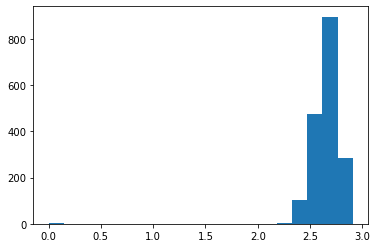

In [35]:
fig, ax = plt.subplots()
ax.hist(chicago_2017['health_indx_prev'], bins =20)

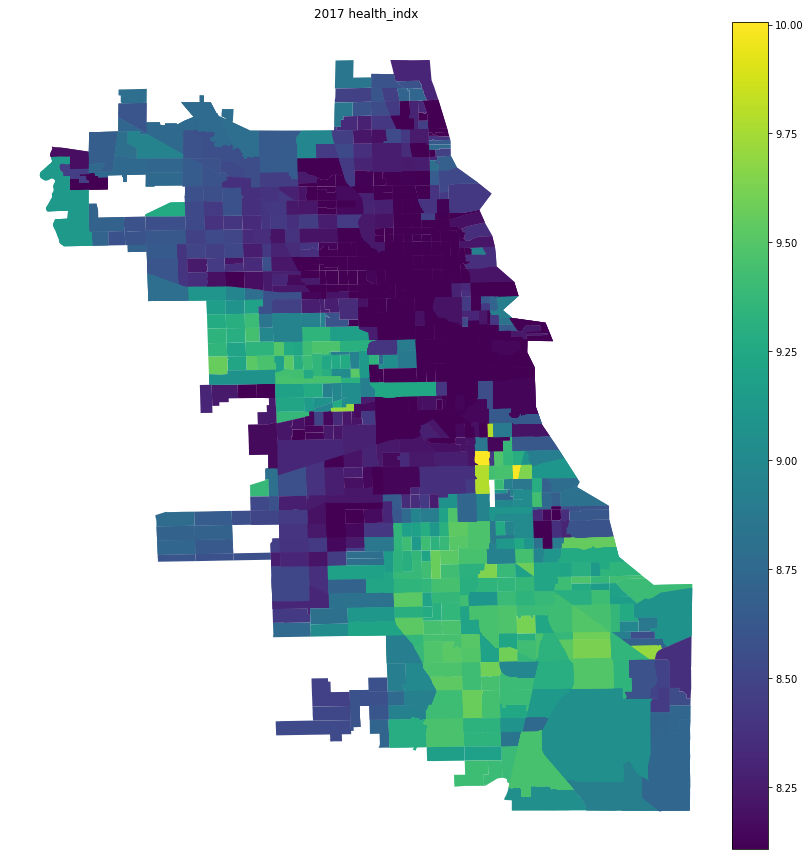

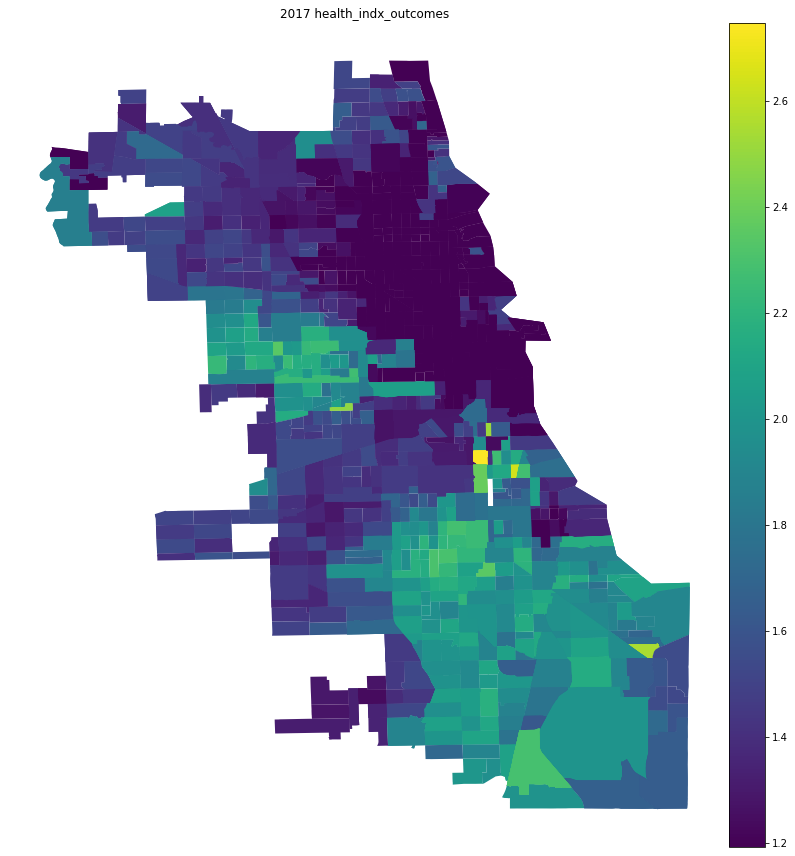

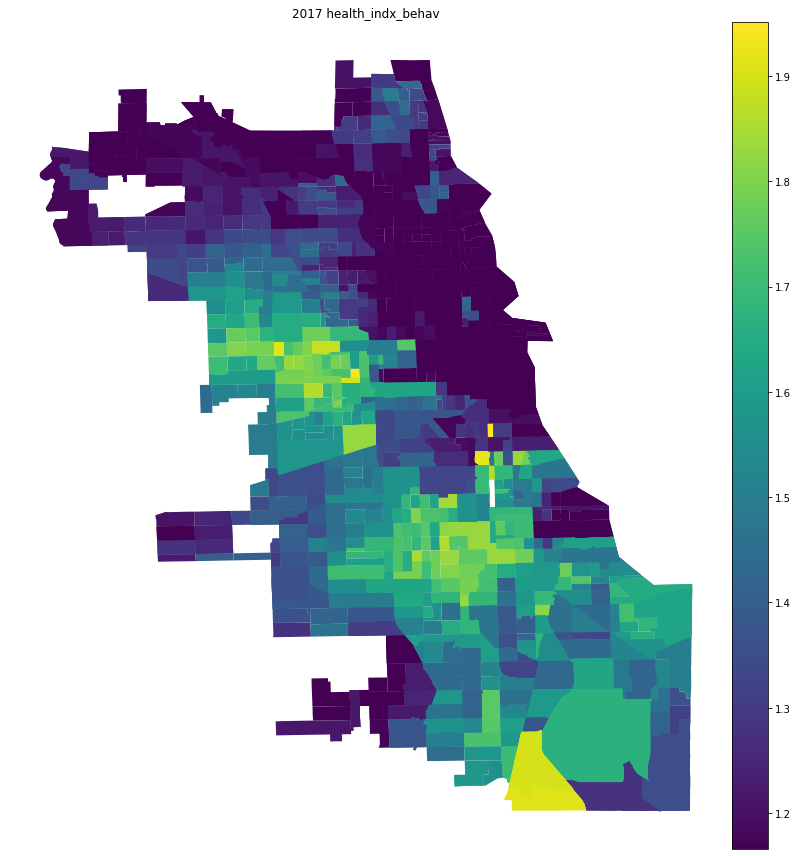

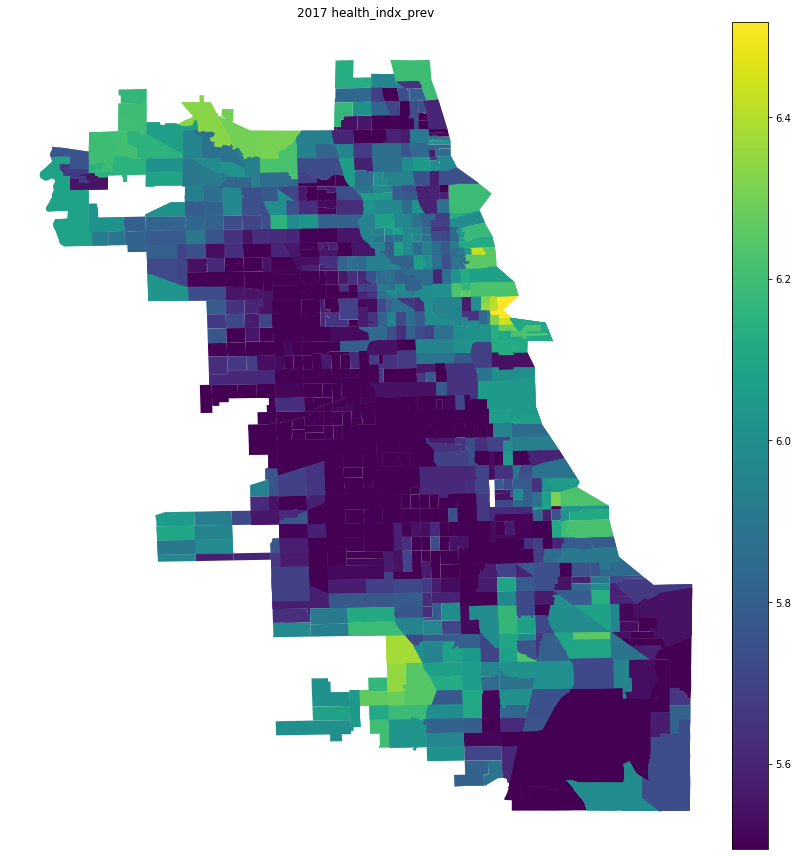

In [7]:
indexes = ['health_indx', 'health_indx_outcomes', 'health_indx_behav','health_indx_prev']

for index in indexes:
    create_choropleth(chicago_2017, 
                      index, 
                      title1=f'2017 {index}')

In [8]:
# Comprehensive index variable list 
hlth_indx_vars = ['health_arthritis', 'health_cancer', 'health_KdnyDisease', 'health_PulDisease', 'health_HrtDisease', 'health_asthma', 'health_diab',
                  'health_HighBldPrs','health_CholHigh','health_GoodMent', 'health_GoodPhys','health_stroke','behav_drink','behav_smoking','behav_NoPhysAct',
                  'behav_obesity', 'prev_CholScreen','prev_HlthInsur', 'prev_BloodMed', 'prev_DocVisit', 'prev_DentVisits', 'behav_sleep', 'prev_mammogram',
                  'prev_smear',  'prev_MenPrev', 'prev_WomPrev', 'prev_tests']

# index variable list: health outcomes
hlth_indx_outcomes = ['health_arthritis', 'health_cancer', 'health_KdnyDisease', 'health_PulDisease', 'health_HrtDisease', 'health_asthma', 'health_diab',
                  'health_HighBldPrs','health_CholHigh','health_GoodMent', 'health_GoodPhys','health_stroke']

# index variable list: unhealthy behaviors
hlth_indx_behav = ['behav_drink','behav_smoking','behav_NoPhysAct','behav_obesity', 'behav_sleep']

# index variable list: preventative services
hlth_indx_prev = ['prev_CholScreen','prev_HlthInsur', 'prev_BloodMed', 'prev_DocVisit', 'prev_DentVisits','prev_mammogram','prev_smear',  'prev_MenPrev', 'prev_WomPrev', 'prev_tests']


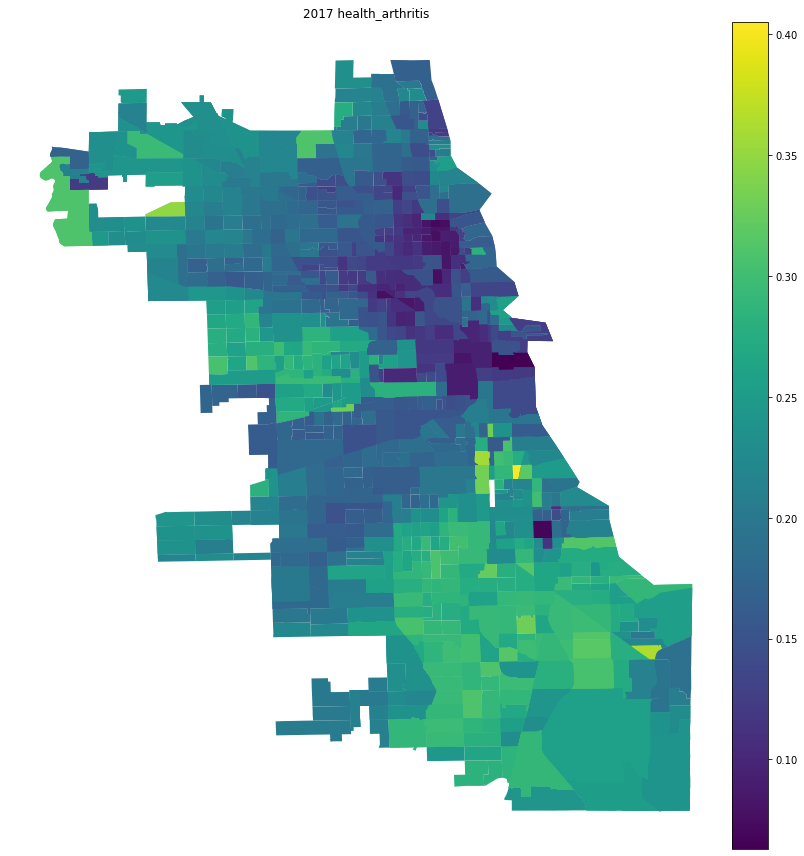

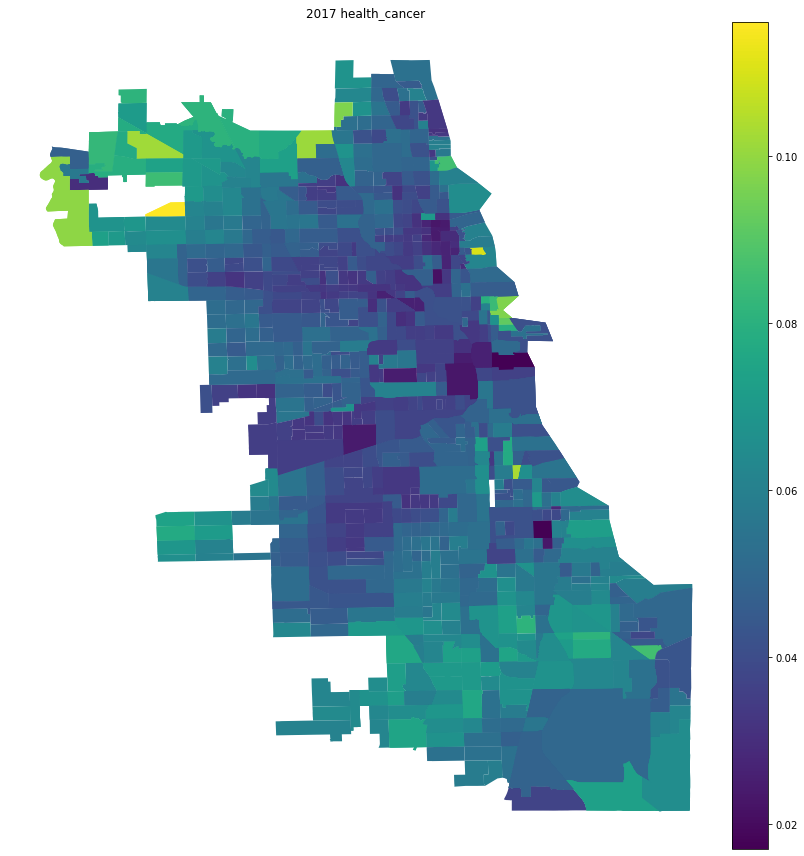

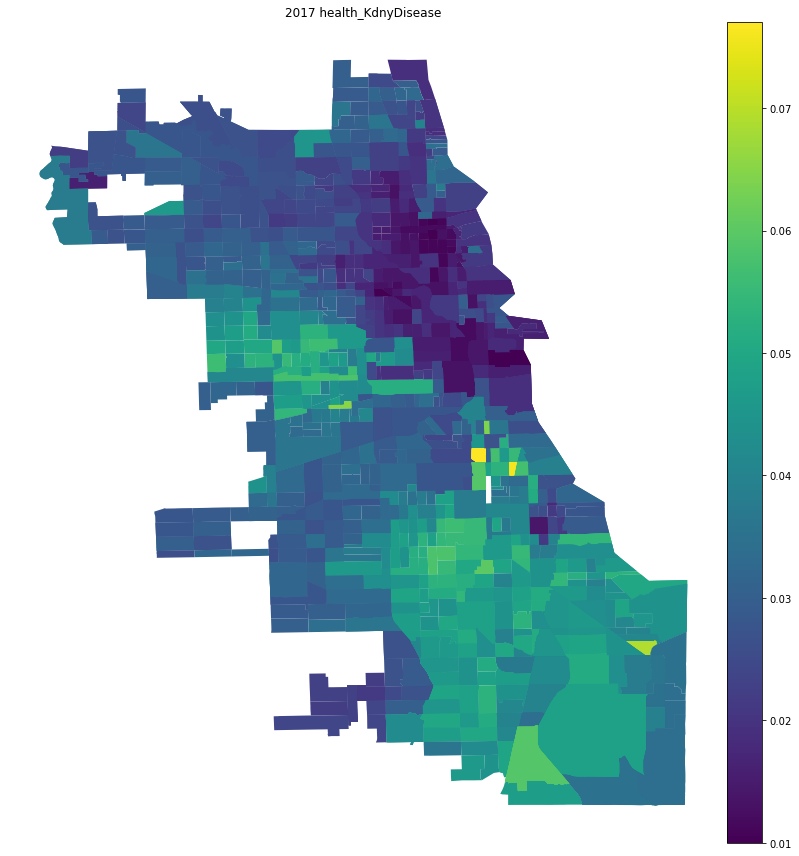

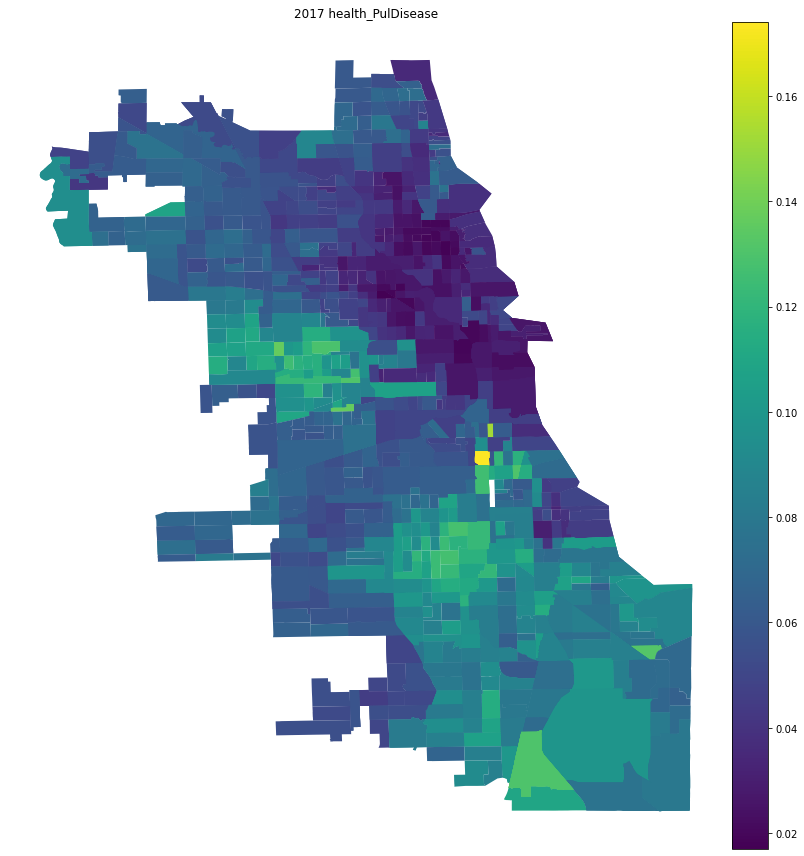

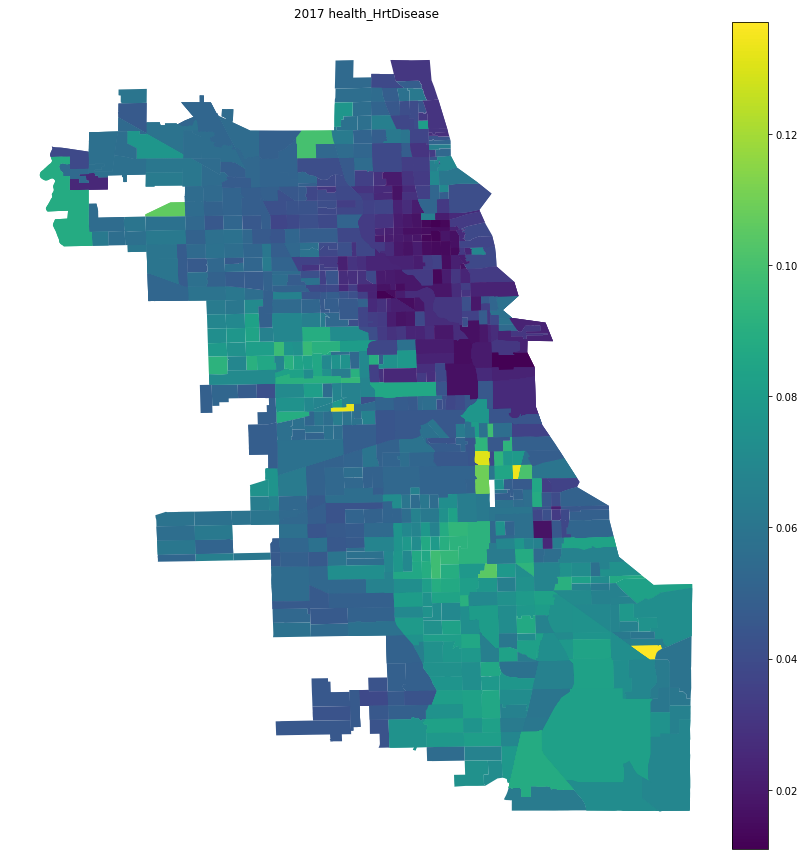

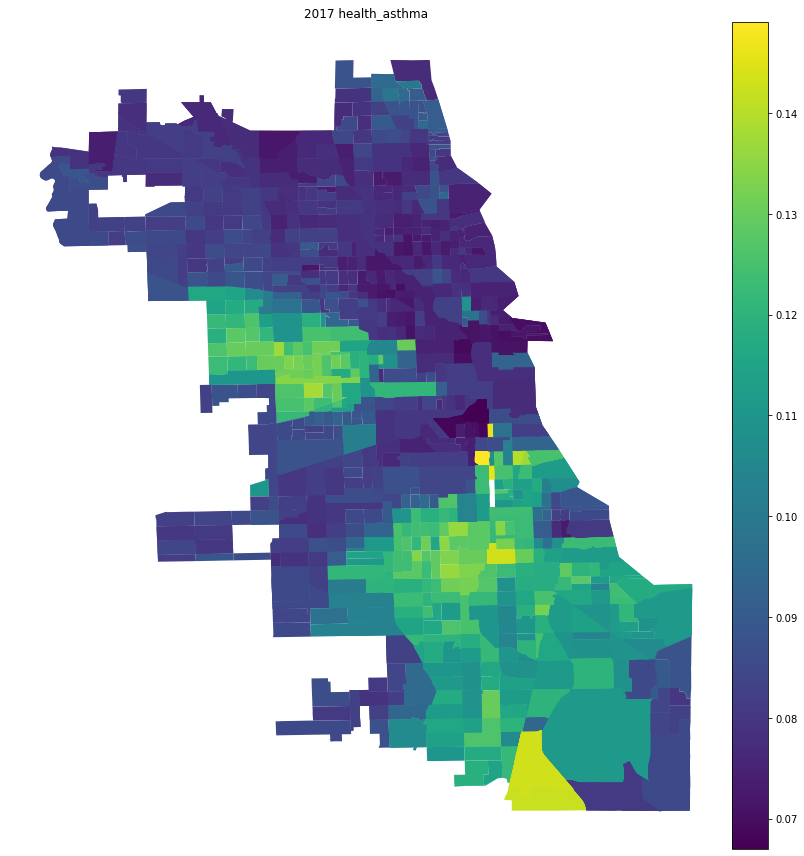

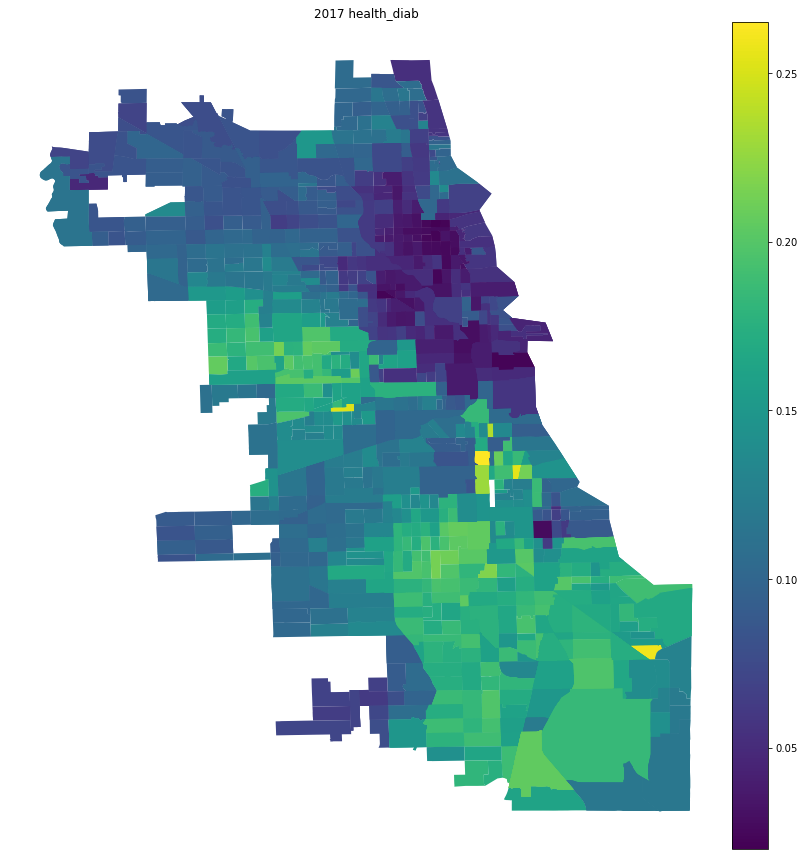

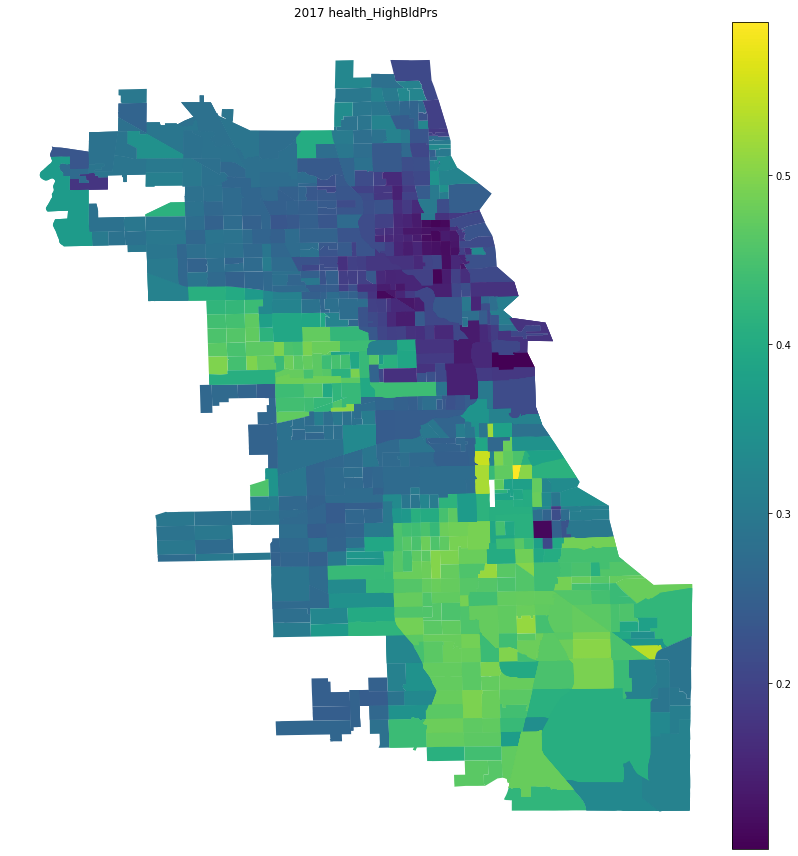

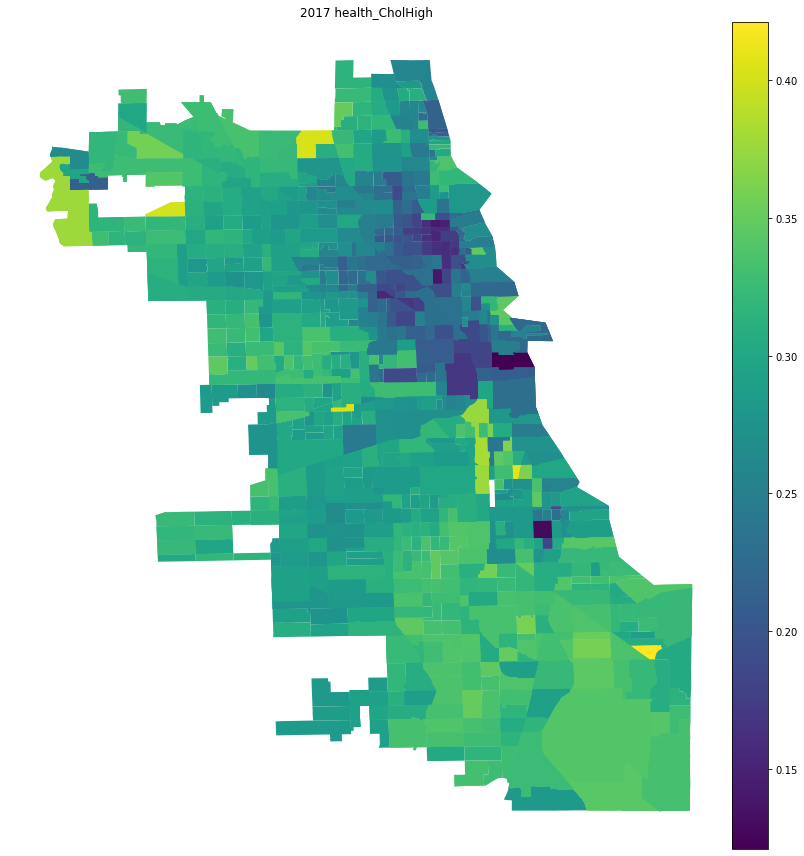

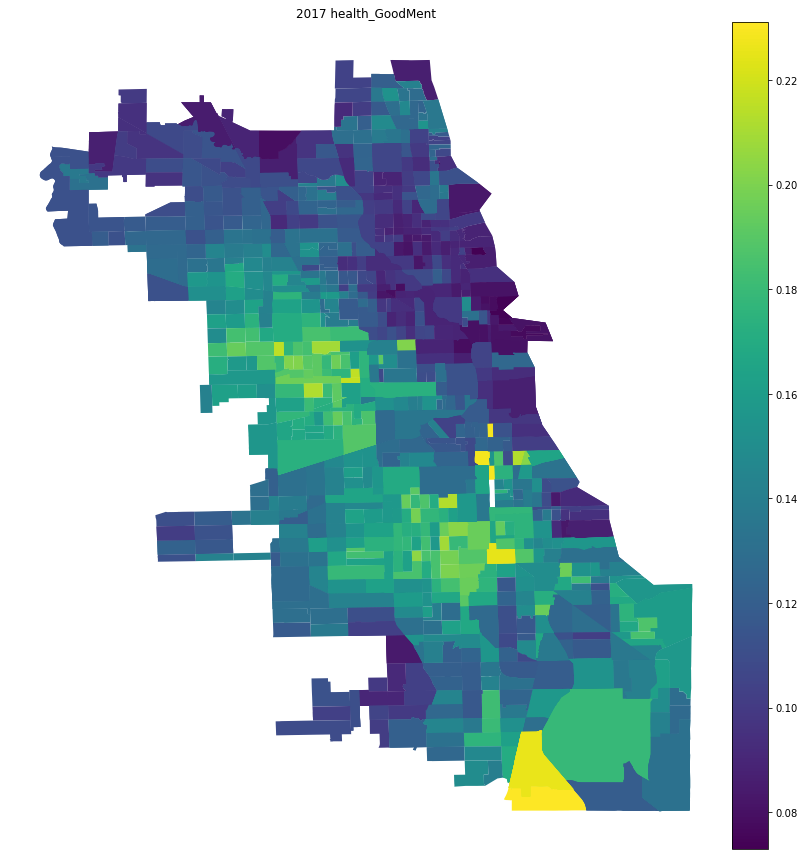

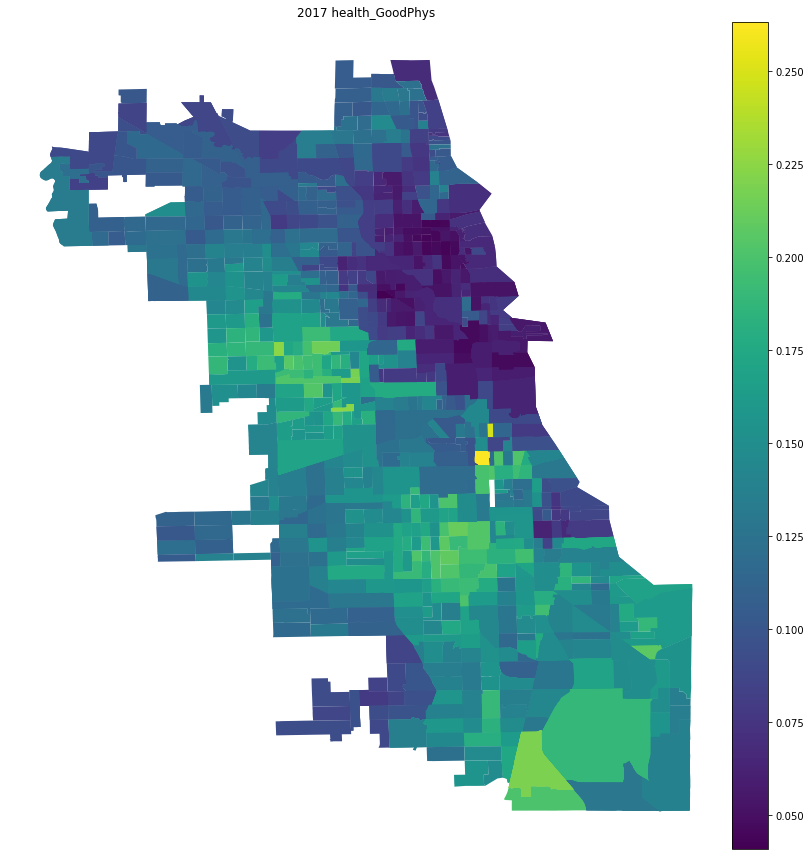

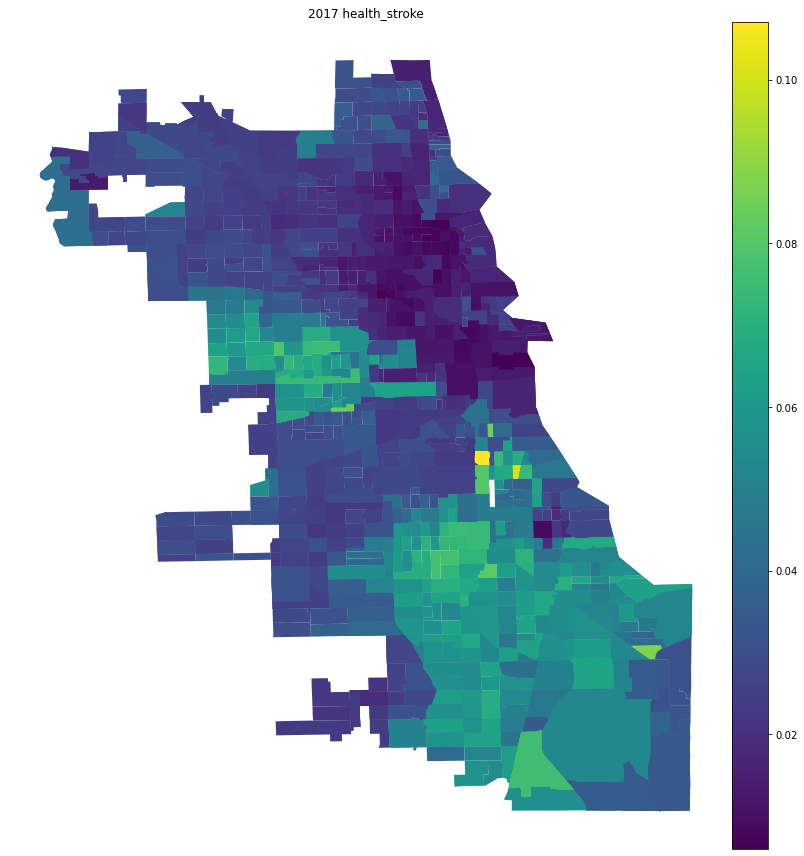

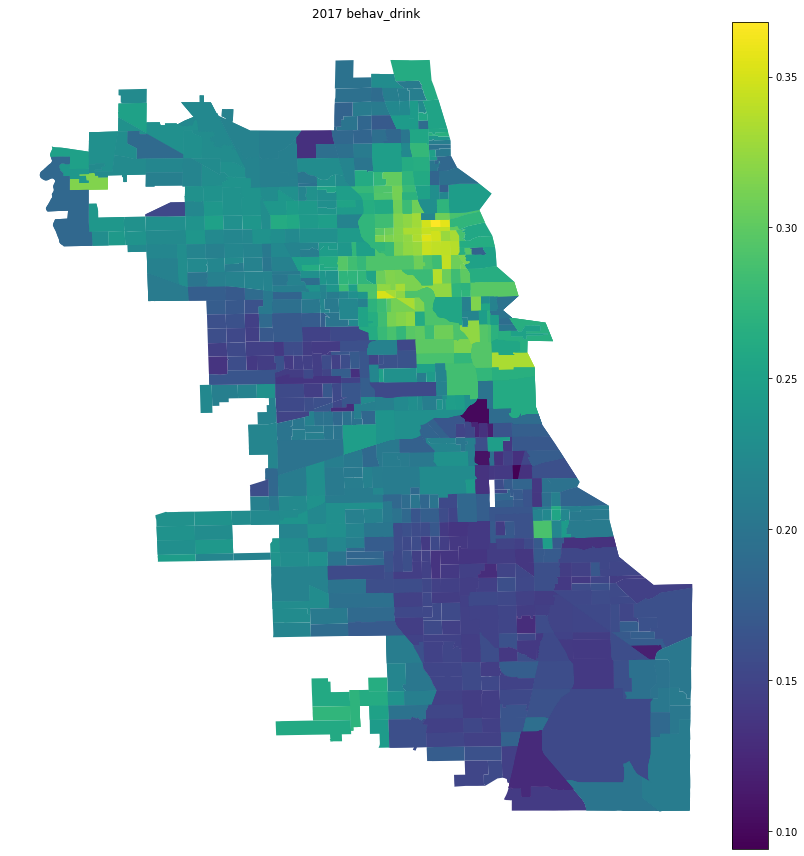

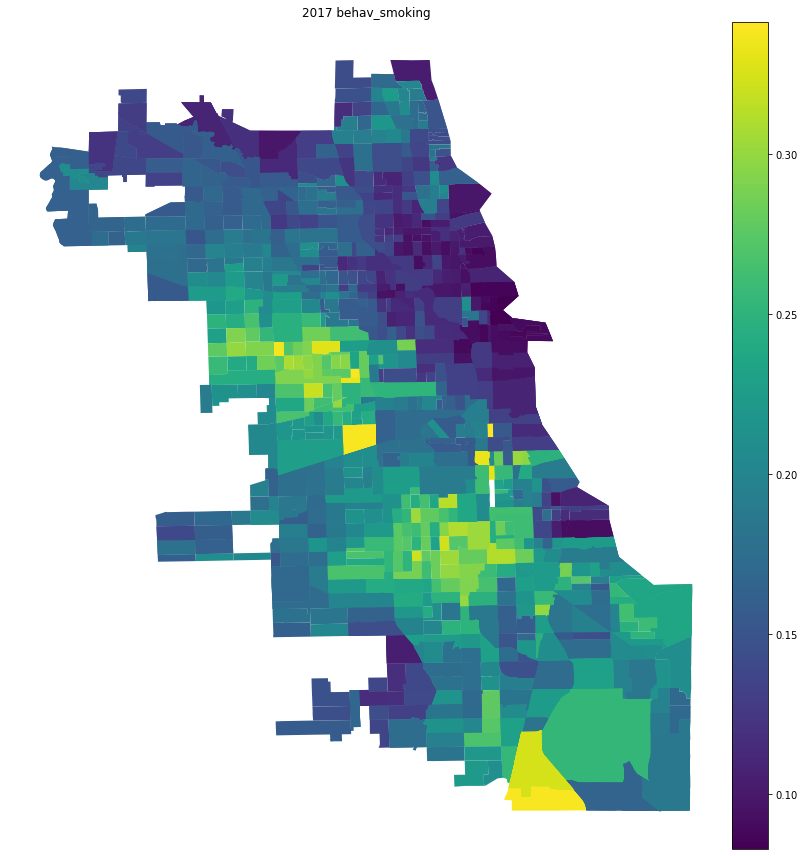

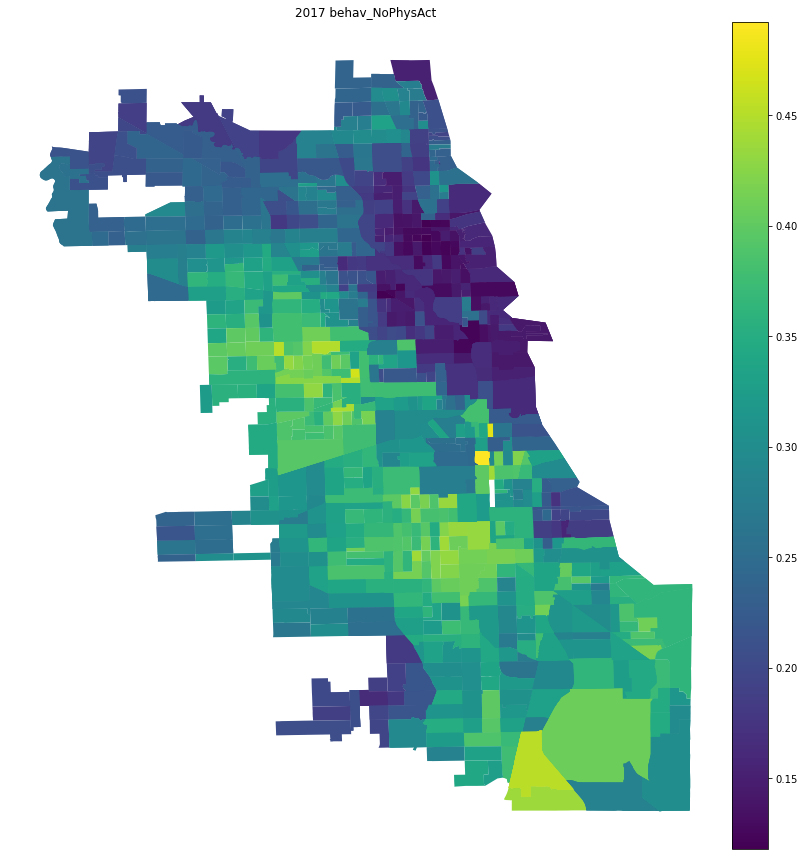

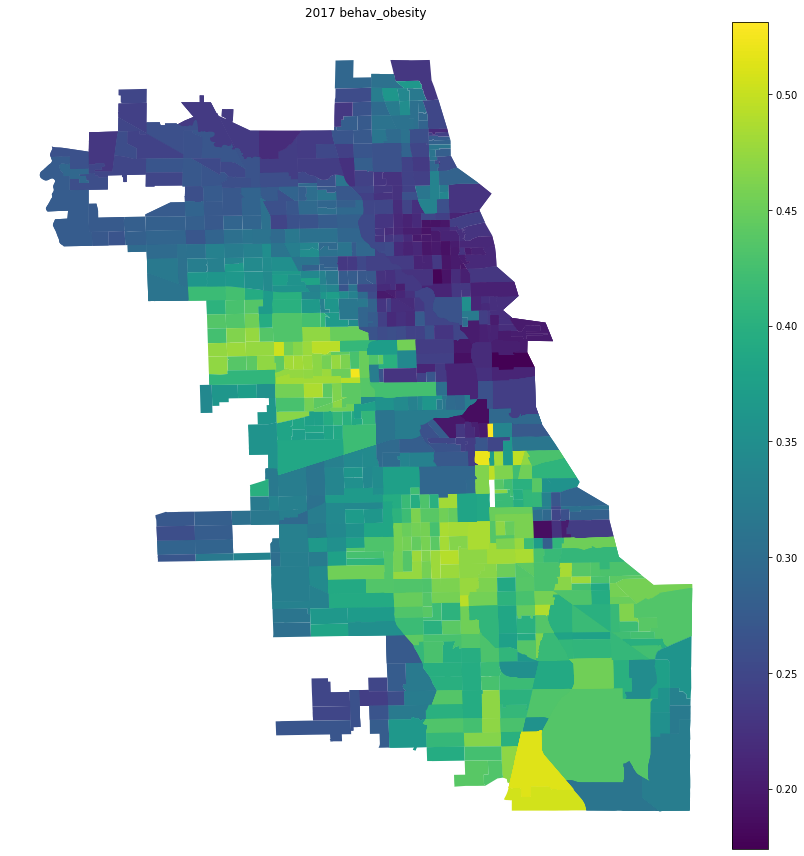

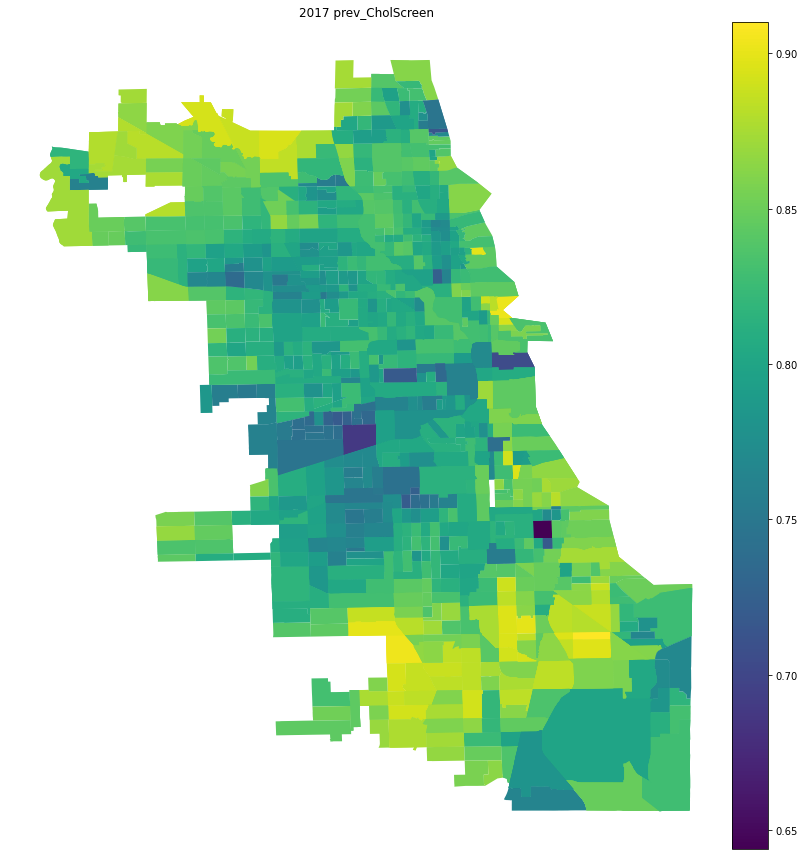

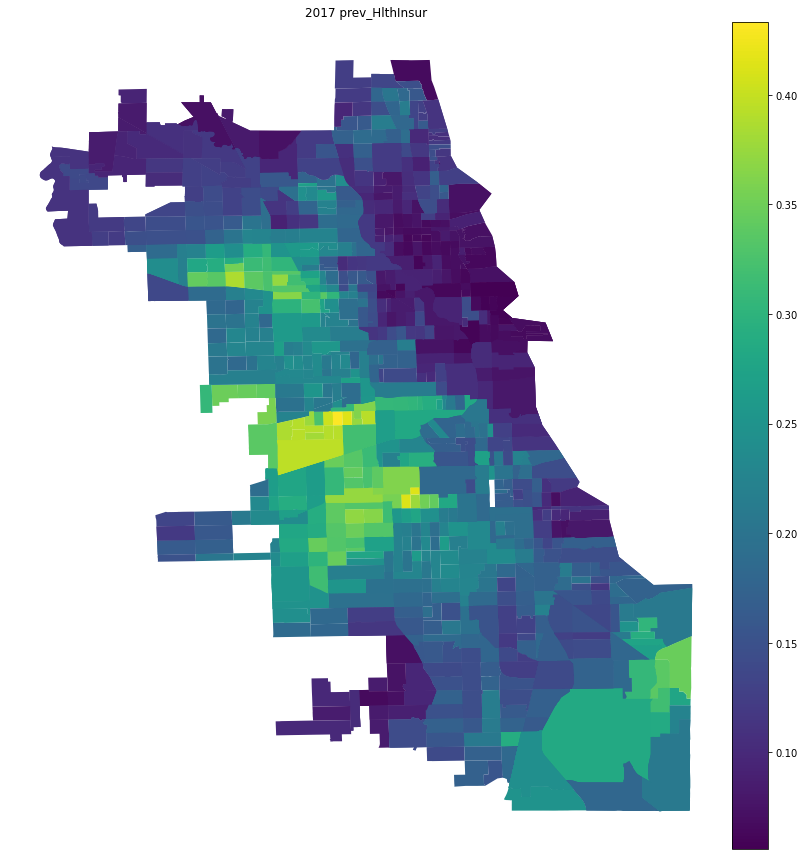

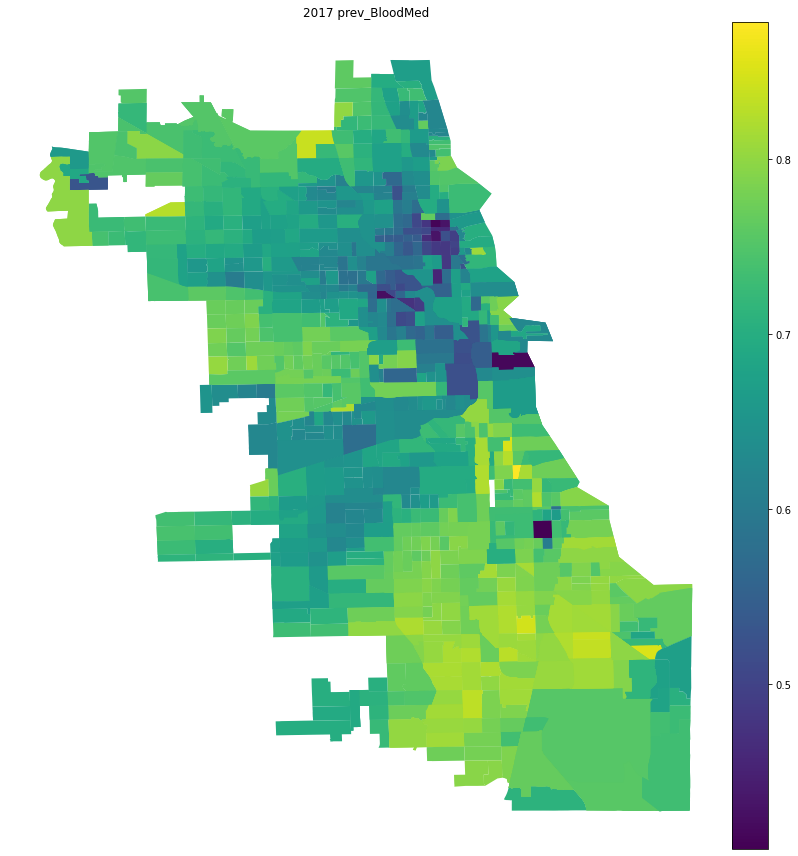

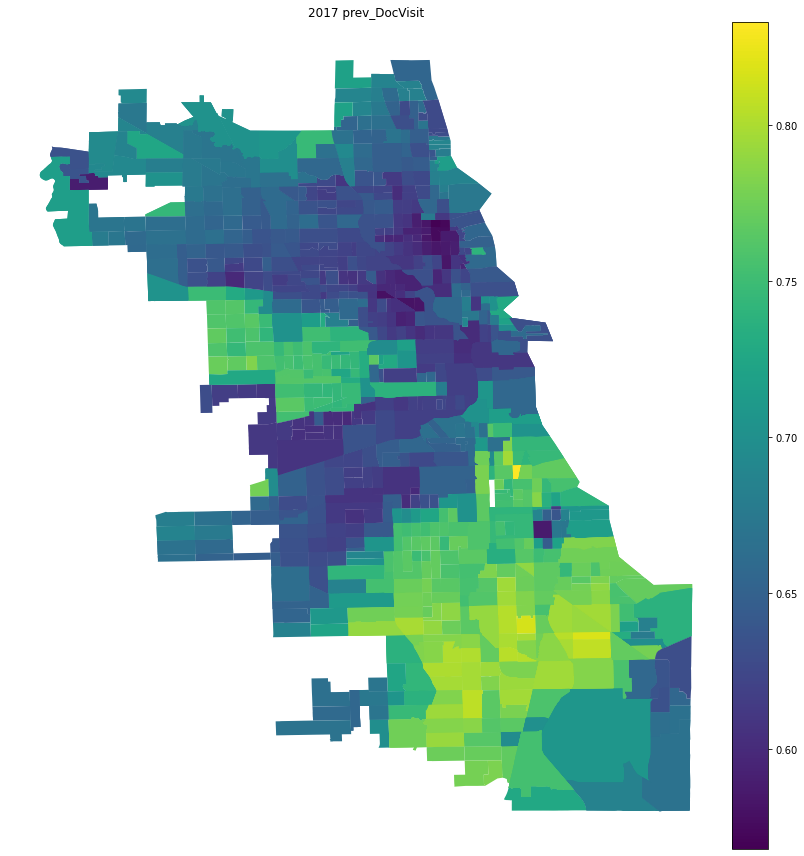

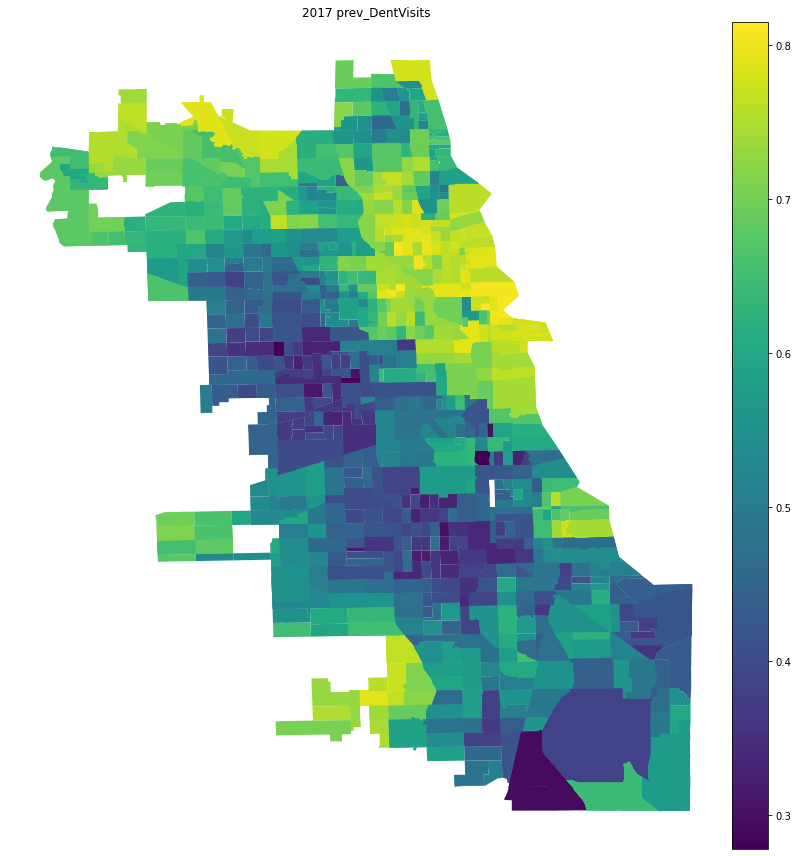

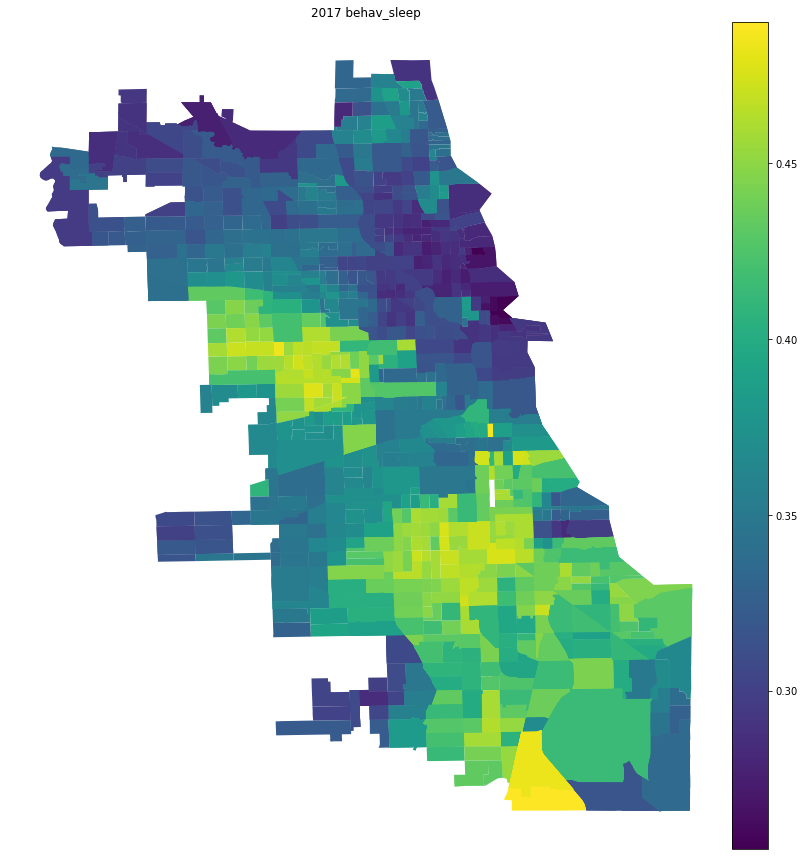

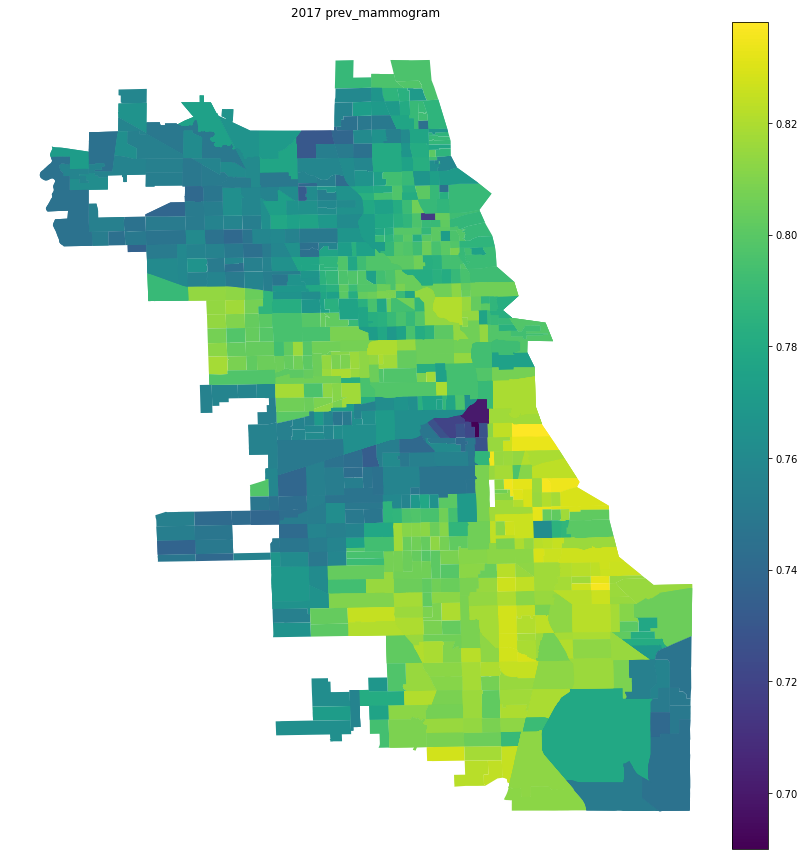

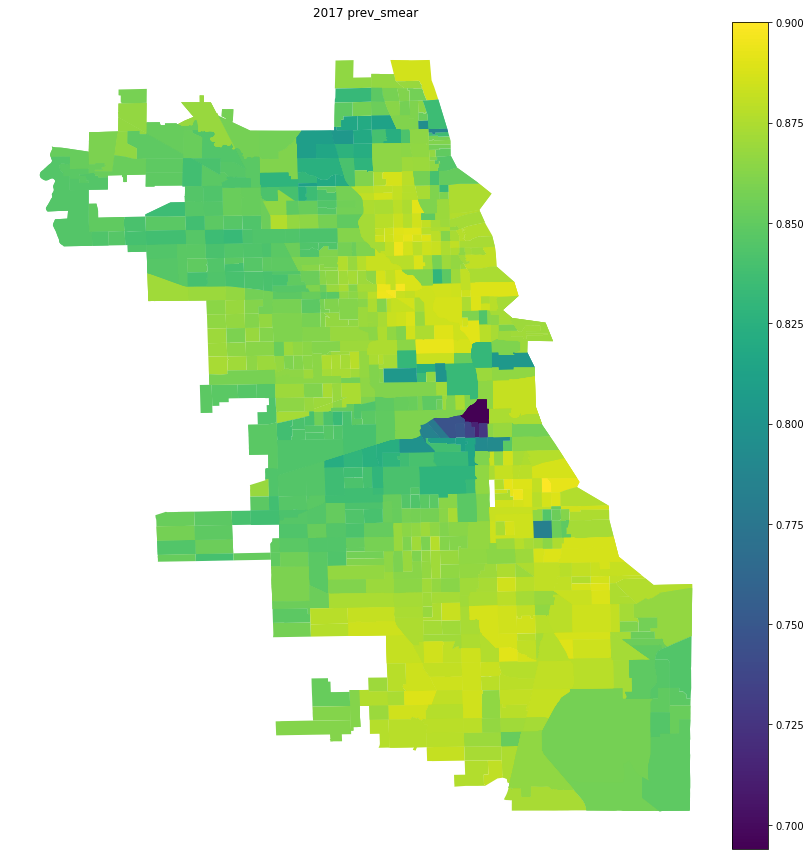

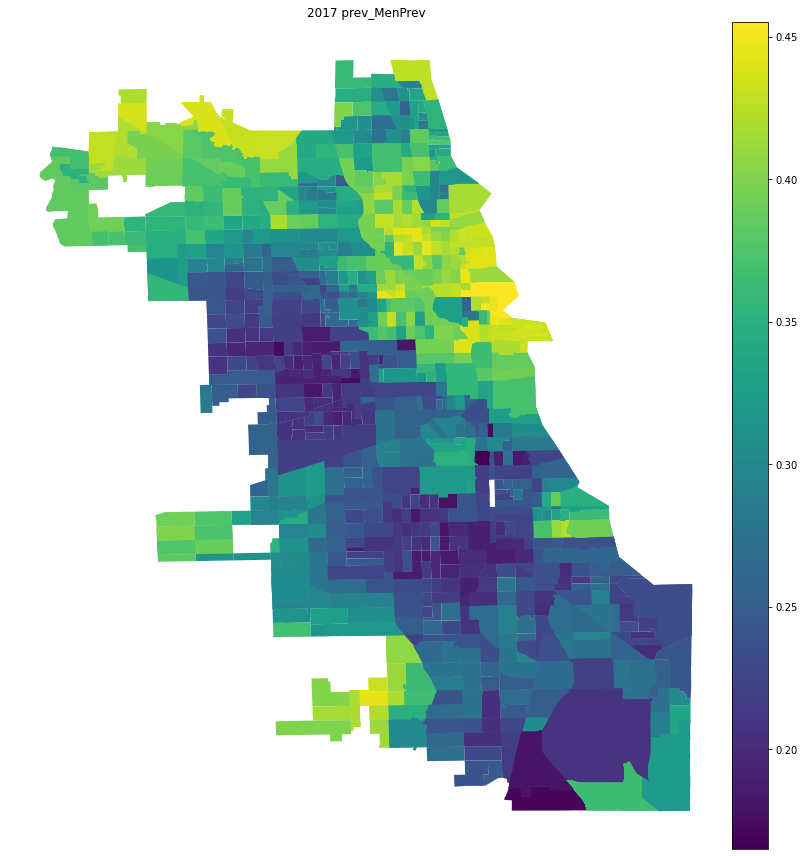

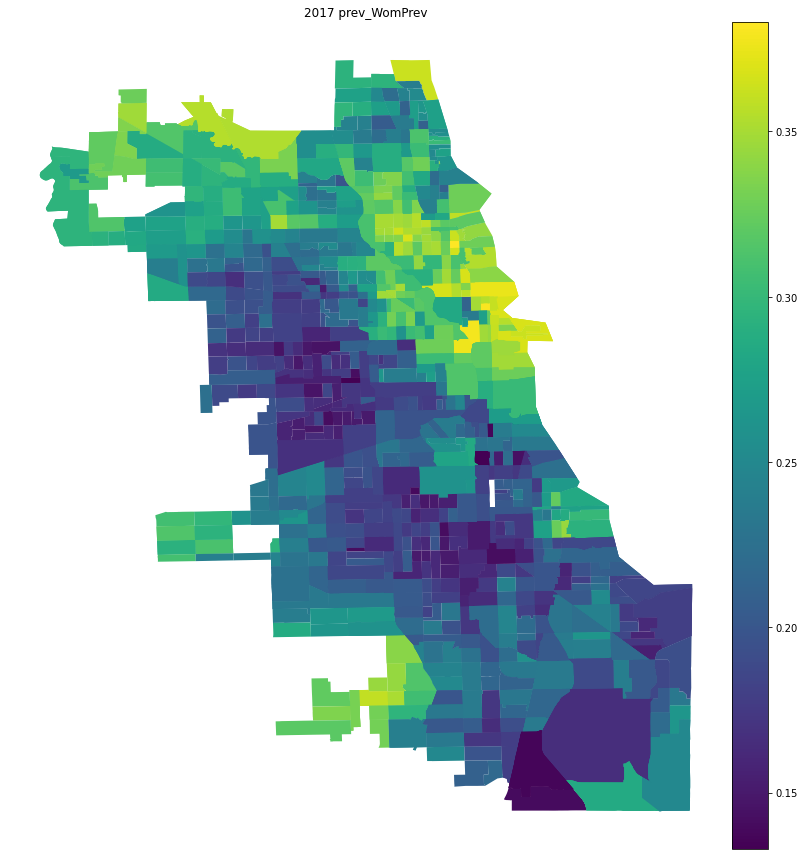

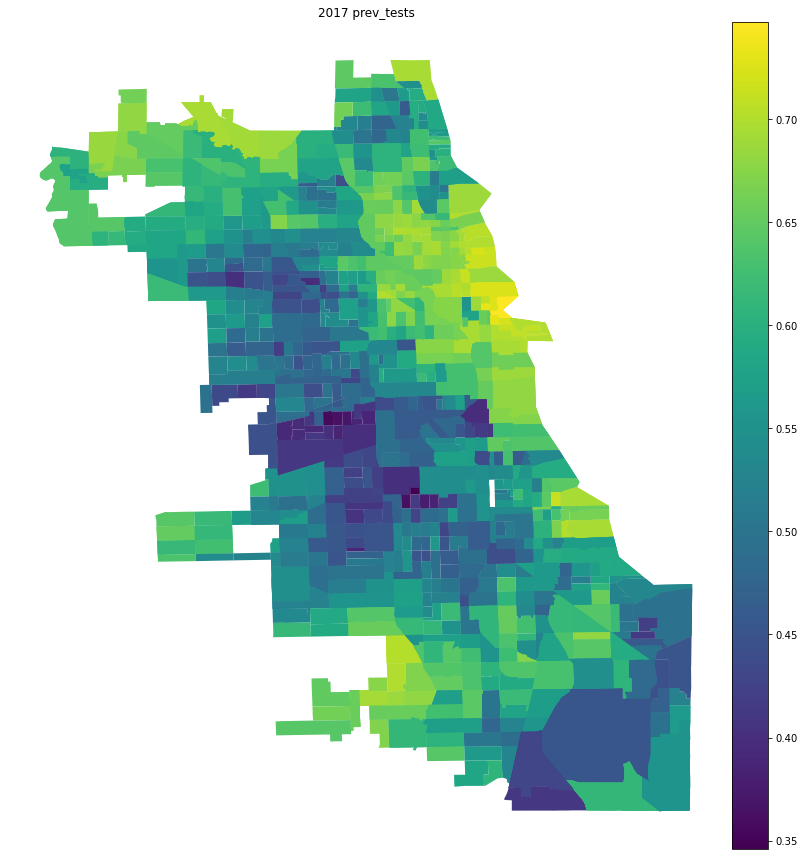

In [9]:
for var in hlth_indx_vars:
    create_choropleth(chicago_2017, 
                  var, 
                  title1=f'2017 {var}')

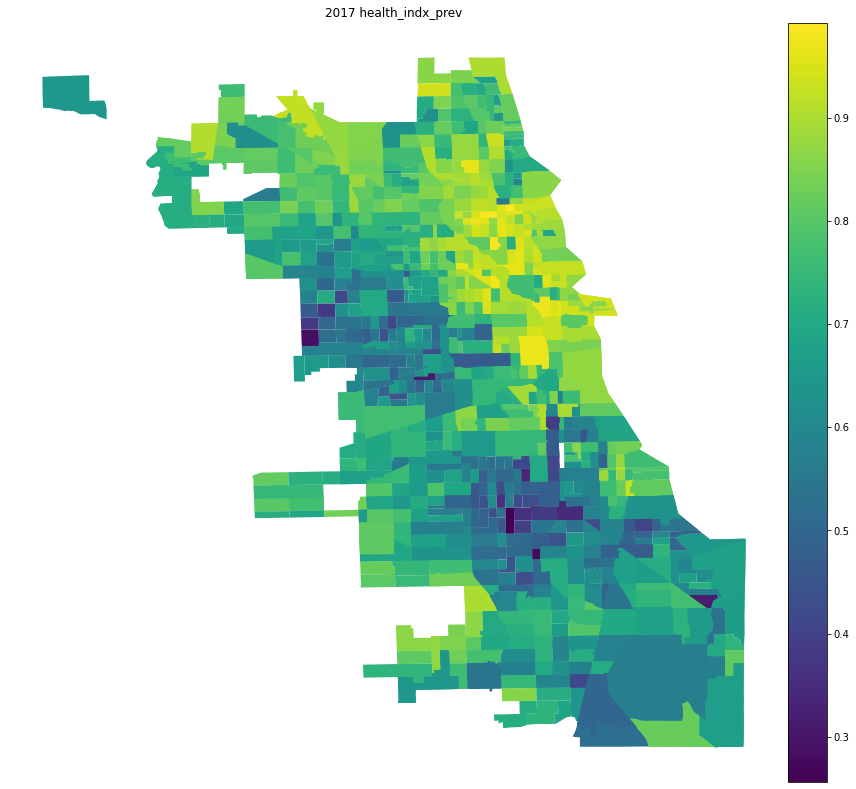

In [10]:
create_choropleth(chicago_2017, 
                  'inter_conrate', 
                  title1=f'2017 {index}')